In [1]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset (assuming the file is in the same directory)
df = pd.read_csv('emails.csv')

# Check the first few rows of the dataset to understand its structure
print(df.head())

# Check for missing values
print(df.isnull().sum())

  Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  jay  \
0   Email 1    0   0    1    0    0   0    2    0    0  ...         0    0   
1   Email 2    8  13   24    6    6   2  102    1   27  ...         0    0   
2   Email 3    0   0    1    0    0   0    8    0    0  ...         0    0   
3   Email 4    0   5   22    0    5   1   51    2   10  ...         0    0   
4   Email 5    7   6   17    1    5   2   57    0    9  ...         0    0   

   valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
0       0    0               0         0         0   0    0           0  
1       0    0               0         0         0   1    0           0  
2       0    0               0         0         0   0    0           0  
3       0    0               0         0         0   0    0           0  
4       0    0               0         0         0   1    0           0  

[5 rows x 3002 columns]
Email No.     0
the           0
to            0
ect           

In [3]:
# Check the column names to identify the correct one for labels
print(df.columns)

Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)


In [4]:
# Check the unique values in the 'Prediction' column
print(df['Prediction'].unique())

[0 1]


In [5]:
# Extracting features (all columns except 'Prediction' and 'Email No.')
# Drop the 'Prediction' (target) and 'Email No.' columns
X = df.drop(columns=['Prediction', 'Email No.'])
y = df['Prediction']  # The target variable is 'Prediction'

In [6]:
# Normalize the features using StandardScaler (if the values are continuous)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scaling the features to a similar range

In [7]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Creating and training the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # Using 5 neighbors
knn_model.fit(X_train, y_train)

# Predicting the target variable (spam or not spam) on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluating the KNN model
print("KNN Model Evaluation:")
print("Accuracy Score: ", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

KNN Model Evaluation:
Accuracy Score:  0.8338164251207729
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.79      0.87       739
           1       0.64      0.95      0.77       296

    accuracy                           0.83      1035
   macro avg       0.81      0.87      0.82      1035
weighted avg       0.88      0.83      0.84      1035



In [9]:
from sklearn.svm import SVC

# Creating and training the SVM model
# Using linear kernel for SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Predicting the target variable (spam or not spam) on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluating the SVM model
print("\nSVM Model Evaluation:")
print("Accuracy Score: ", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


SVM Model Evaluation:
Accuracy Score:  0.9449275362318841
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       739
           1       0.89      0.92      0.91       296

    accuracy                           0.94      1035
   macro avg       0.93      0.94      0.93      1035
weighted avg       0.95      0.94      0.95      1035



In [10]:
from sklearn.model_selection import cross_val_score

# Evaluating KNN using cross-validation
knn_cv_scores = cross_val_score(
    knn_model, X_scaled, y, cv=5, scoring='accuracy')  # 5-fold cross-validation
print("\nKNN Model Cross-Validation Accuracy Scores: ", knn_cv_scores)
print("Average KNN Accuracy: ", knn_cv_scores.mean())

# Evaluating SVM using cross-validation
svm_cv_scores = cross_val_score(
    svm_model, X_scaled, y, cv=5, scoring='accuracy')  # 5-fold cross-validation
print("\nSVM Model Cross-Validation Accuracy Scores: ", svm_cv_scores)
print("Average SVM Accuracy: ", svm_cv_scores.mean())


KNN Model Cross-Validation Accuracy Scores:  [0.76618357 0.82415459 0.82591876 0.8172147  0.7688588 ]
Average KNN Accuracy:  0.80046608546146

SVM Model Cross-Validation Accuracy Scores:  [0.9294686  0.94782609 0.94294004 0.93713733 0.91489362]
Average SVM Accuracy:  0.9344531344901373


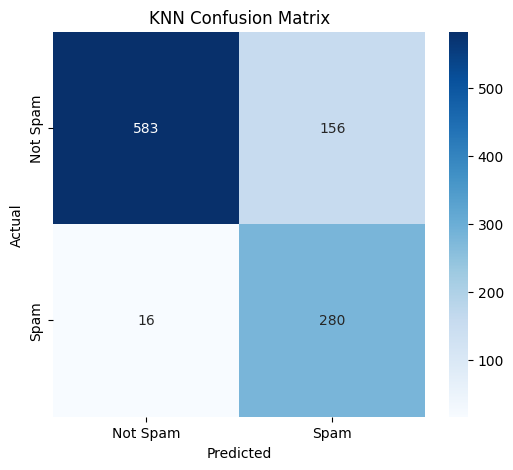

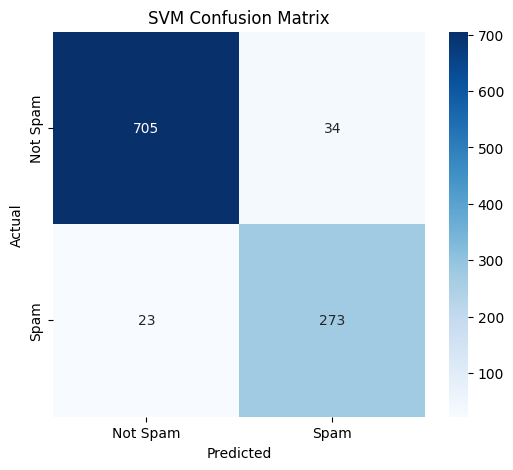

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix for KNN
knn_cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 5))
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues', xticklabels=[
            'Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Confusion Matrix for SVM
svm_cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6, 5))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', xticklabels=[
            'Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

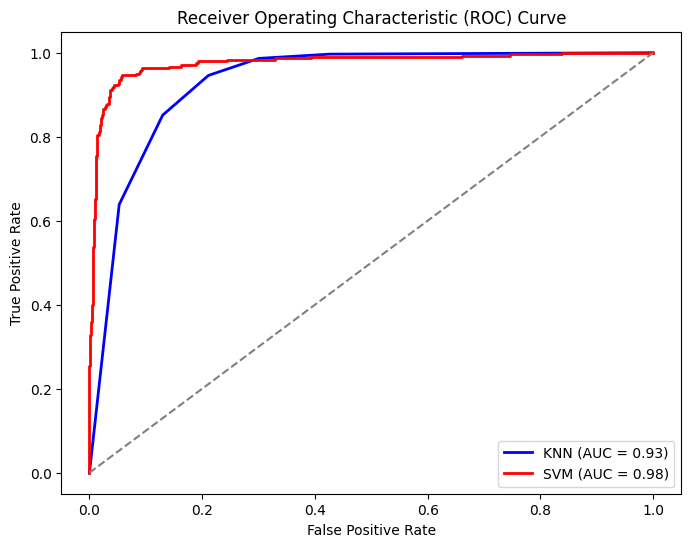

In [12]:
from sklearn.metrics import roc_curve, auc

# ROC Curve for KNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_model.predict_proba(X_test)[:, 1])
roc_auc_knn = auc(fpr_knn, tpr_knn)

# ROC Curve for SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_model.decision_function(X_test))
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2,
         label='KNN (AUC = %0.2f)' % roc_auc_knn)
plt.plot(fpr_svm, tpr_svm, color='red', lw=2,
         label='SVM (AUC = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [13]:
from sklearn.metrics import classification_report, roc_auc_score

# Classification Report for KNN
print("\nKNN Model Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Classification Report for SVM
print("\nSVM Model Classification Report:")
print(classification_report(y_test, y_pred_svm))

# ROC AUC Score for KNN
knn_auc = roc_auc_score(y_test, knn_model.predict_proba(X_test)[:, 1])
print("\nKNN ROC AUC Score: ", knn_auc)

# ROC AUC Score for SVM
svm_auc = roc_auc_score(y_test, svm_model.decision_function(X_test))
print("SVM ROC AUC Score: ", svm_auc)


KNN Model Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.79      0.87       739
           1       0.64      0.95      0.77       296

    accuracy                           0.83      1035
   macro avg       0.81      0.87      0.82      1035
weighted avg       0.88      0.83      0.84      1035


SVM Model Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       739
           1       0.89      0.92      0.91       296

    accuracy                           0.94      1035
   macro avg       0.93      0.94      0.93      1035
weighted avg       0.95      0.94      0.95      1035


KNN ROC AUC Score:  0.931122682222141
SVM ROC AUC Score:  0.9761776323007717


In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Calculate the performance metrics for KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
knn_auc = roc_auc_score(y_test, y_pred_knn)

# Calculate the performance metrics for SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
svm_auc = roc_auc_score(y_test, y_pred_svm)

# Create a DataFrame to compare model performance
metrics = {
    'Model': ['KNN', 'SVM'],
    'Accuracy': [accuracy_knn, accuracy_svm],
    'Precision': [precision_knn, precision_svm],
    'Recall': [recall_knn, recall_svm],
    'F1-Score': [f1_knn, f1_svm],
    'ROC AUC': [knn_auc, svm_auc]
}

# Create the comparison DataFrame
comparison_df = pd.DataFrame(metrics)

# Print the model comparison
print("Model Performance Comparison:")
print(comparison_df)

Model Performance Comparison:
  Model  Accuracy  Precision    Recall  F1-Score   ROC AUC
0   KNN  0.833816   0.642202  0.945946  0.765027  0.867425
1   SVM  0.944928   0.889251  0.922297  0.905473  0.938145
